# Análise de vendas

### Por meio desta análise, quero trazer algumas informações sobre vendas obtidos por meio do DataSet 'Sales_Data', disponibilizado no link 'https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git'.
### Esta análise é meramente para estudo pessoal.

### Importando bibliotecas necessárias

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Importando DataSet

In [3]:
arquivos = [arquivo for arquivo in os.listdir('./Sales_Data')]

todos_os_meses = pd.DataFrame()

for arquivo in arquivos:
    df = pd.read_csv('./Sales_Data/' +arquivo)
    todos_os_meses = pd.concat([todos_os_meses, df])

todos_os_meses.to_csv('todos_os_meses.csv', index=False)



In [4]:
vendas = pd.read_csv('todos_os_meses.csv')

vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Criar Colunas que facilitem o trabalho

#### Coluna para meses

In [14]:
vendas ['Months'] = vendas['Order Date'].str[0:2]
vendas ['Months'] = vendas['Months'].astype('int32')
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Coluna com total de vendas em USD ($)

In [13]:
vendas ['Quantity Ordered'] = pd.to_numeric(vendas ['Quantity Ordered'])
vendas ['Price Each'] = pd.to_numeric(vendas ['Price Each'])
pd.set_option('display.precision', 2)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Months            185950 non-null  object 
 7   Cities            185950 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.8+ MB


In [15]:
vendas ['Total Sales'] = (vendas['Quantity Ordered'] * vendas['Price Each'])
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Cities,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Coluna com cidades

In [11]:
def cidades (adress):
    return adress.split(',')[1]

def estados (adress):
    return adress.split(',')[2].split(' ')[1]

vendas ['Cities'] = vendas['Purchase Address'].apply(lambda x: cidades(x) + ' (' + estados(x) + ')')
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,Los Angeles (CA)


#### Coluna com horas

In [21]:
vendas ['Order Date'] = pd.to_datetime(vendas['Order Date'])

In [22]:
vendas ['Hour'] = vendas['Order Date'].dt.hour
vendas ['Minutes'] = vendas['Order Date'].dt.minute
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Cities,Total Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


### Limpar os dados

#### Retirando NaNs

In [9]:
nan_df = vendas[vendas.isna().any(axis=1)]
nan_df.head()

vendas = vendas.dropna(how='all')
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Retirando 'Or'

In [10]:
vendas = vendas[vendas['Order Date'].str[0:2] != 'Or']
vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Pergunta 1: Qual foi o melhor mes de vendas ? Quanto foi vendido nesse mês ?

In [90]:
resultado_1 = vendas.groupby('Months').sum('Total vendas')

Text(0.5, 0, 'Meses do ano')

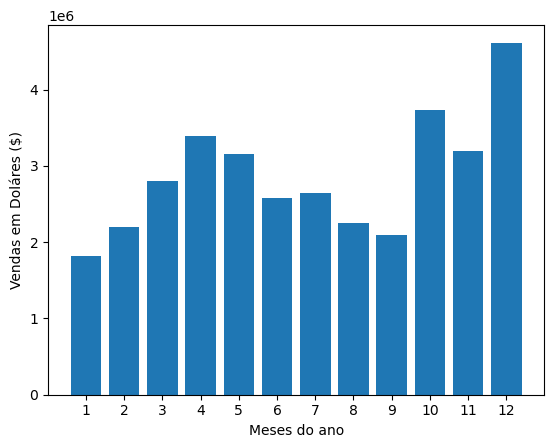

In [95]:
months = range(1, 13)

plt.bar(months, resultado_1['Total vendas'])
plt.show
plt.xticks(months)
plt.ylabel('Vendas em Doláres ($)')
plt.xlabel("Meses do ano")

# Dexembro e Outubro são os maiores meses de vendas, talvez por conta de bônus entre empregados e feriados comemorativos.

### Pergunta 2: Qual cidade vendeu mais produtos ?

In [126]:
resultado_2 = vendas.groupby('Cities').sum('Quantity Ordered')
resultado_2

,Quantity Ordered,Price Each,Months,Total vendas,Total Sales
Cities,,,,,
Atlanta (GA),16602,2.78e+06,104794,2.80e+06,2.80e+06
Austin (TX),11153,1.81e+06,69829,1.82e+06,1.82e+06
Boston (MA),22528,3.64e+06,141112,3.66e+06,3.66e+06
Dallas (TX),16730,2.75e+06,104620,2.77e+06,2.77e+06
Los Angeles (CA),33289,5.42e+06,208325,5.45e+06,5.45e+06
New York City (NY),27932,4.64e+06,175741,4.66e+06,4.66e+06
Portland (ME),2750,4.47e+05,17144,4.50e+05,4.50e+05
Portland (OR),11303,1.86e+06,70621,1.87e+06,1.87e+06
San Francisco (CA),50239,8.21e+06,315520,8.26e+06,8.26e+06


Text(0.5, 0, 'Cidades')

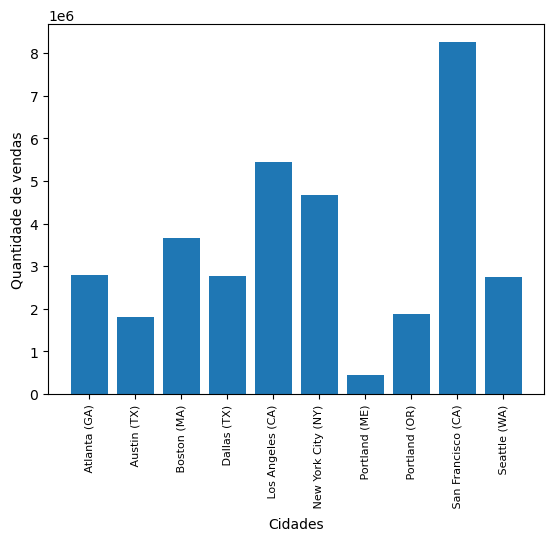

In [133]:
cities = [cidade for cidade, df in vendas.groupby('Cities')]

plt.bar(cities, resultado_2['Total Sales'])
plt.show
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Quantidade de vendas')
plt.xlabel("Cidades")

# San Francisco é a cidade com mais vendas.

### Pergunta 3: Que horas devem ser passados comerciais para aumentar as vendas ?

In [29]:
resultado_3 = vendas.groupby('Hour').sum('Total Sales')
resultado_3

,Quantity Ordered,Price Each,Months,Total Sales,Minutes
Hour,,,,,
0,4428,7.09e+05,27554,7.14e+05,103596
1,2619,4.58e+05,16657,4.61e+05,61807
2,1398,2.34e+05,8507,2.35e+05,32508
3,928,1.45e+05,5904,1.46e+05,23044
4,937,1.62e+05,6148,1.63e+05,26876
5,1493,2.30e+05,9301,2.31e+05,42877
6,2810,4.45e+05,17539,4.48e+05,80343
7,4556,7.41e+05,28850,7.45e+05,127447
8,7002,1.19e+06,43626,1.19e+06,198135


<function matplotlib.pyplot.show(close=None, block=None)>

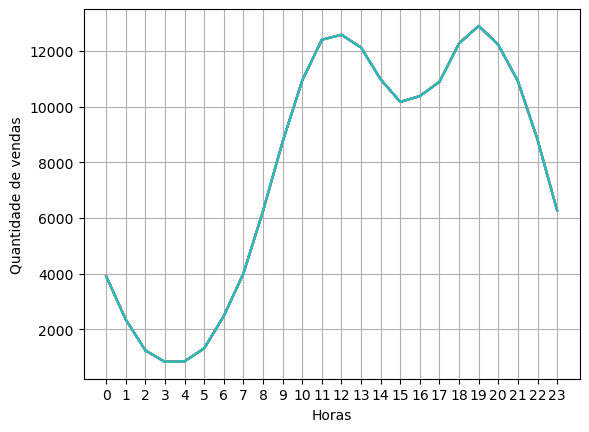

In [36]:
hour = [hour for hour, df in vendas.groupby('Hour')]

plt.plot(hour, vendas.groupby(['Hour']).count())
plt.xticks(hour)
plt.ylabel('Quantidade de vendas')
plt.xlabel("Horas")
plt.grid()
plt.show

# As horas com mais vendas são as 12h e as 19h, recomendo que os comerciais passem entre 1 hora antes desses horários até os próprios horários.

### Pergunta 4: Quais produtos são mais vendidos juntos ?

In [50]:
duplicados = vendas[vendas['Order ID'].duplicated(keep = False)]

duplicados ['Grouped'] = duplicados.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

duplicados = duplicados[['Order ID', 'Grouped']].drop_duplicates()

duplicados.head(20)

C:\Users\Win11_Pro\AppData\Local\Temp\ipykernel_13688\524523306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados ['Grouped'] = duplicados.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [53]:
count = Counter()

for linha in duplicados['Grouped']:
    lista = linha.split(', ')
    count.update(Counter(combinations(lista, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]